#TAREA 2.1

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t=0.001$ es un intervalo de tiempo y
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule tres caminatas con $10$ segundos (10000 pasos) y represéntelo en un gráfico 3D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Parámetros
T = 10.0
delta_t = 0.001
N_pasos = int(T / delta_t)
N_caminatas = 3

#Simulación
caminatas = np.zeros((N_caminatas, N_pasos + 1, 3))

for c in range(N_caminatas):
    X = np.random.choice([1, -1], size=(N_pasos, 3))
    dW = X * np.sqrt(delta_t)
    caminatas[c, 1:, :] = np.cumsum(dW, axis=0)

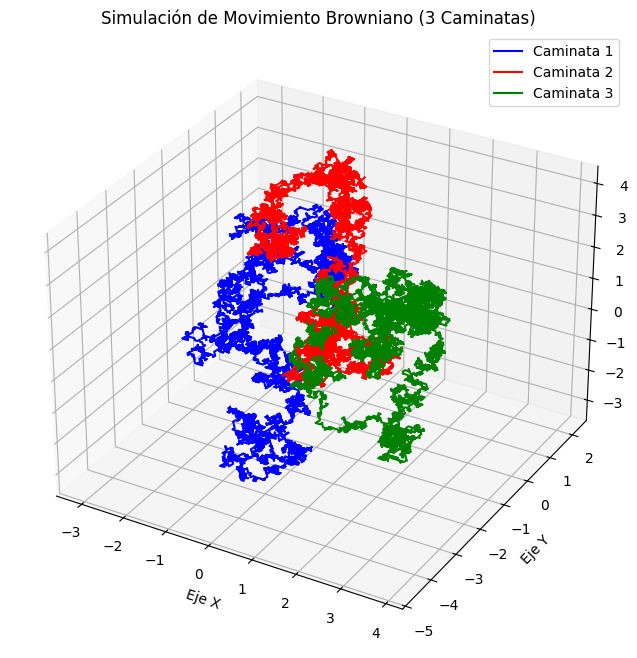

In [3]:
grafica = plt.figure(figsize=(10, 8))
n = grafica.add_subplot(111, projection='3d')

colores = ['blue', 'red', 'green']
for c in range(N_caminatas):
    x = caminatas[c, :, 0]
    y = caminatas[c, :, 1]
    z = caminatas[c, :, 2]
    n.plot(x, y, z, label=f'Caminata {c+1}', color=colores[c])
    n.scatter(x[0], y[0], z[0], marker='o', color=colores[c], s=50) # Inicio
    n.scatter(x[-1], y[-1], z[-1], marker='x', color=colores[c], s=50) # Final

n.set_title('Simulación de Movimiento Browniano (3 Caminatas)')
n.set_xlabel('Eje X')
n.set_ylabel('Eje Y')
n.set_zlabel('Eje Z')
n.legend()
plt.show()

Modifique la caminata anterior de tal forma que solo le regrese la última posición.

In [6]:
def sim_mod(N_pasos):
    movimientos_base = np.array([[1, 0, 0], [-1, 0, 0],
                                 [0, 1, 0], [0, -1, 0],
                                 [0, 0, 1], [0, 0, -1]])
    posicion = np.zeros((N_pasos + 1, 3))
    paso_anterior = np.zeros(3)  # El paso inicial es (0,0,0)
    for i in range(1, N_pasos + 1):
        if i == 1:
            idx = np.random.choice(6)
            paso_actual = movimientos_base[idx]
        else:
            es_inverso = np.all(movimientos_base == -paso_anterior, axis=1)
            indices_validos = np.where(~es_inverso)[0]

            idx_valido = np.random.choice(indices_validos)
            paso_actual = movimientos_base[idx_valido]
        posicion[i] = posicion[i-1] + paso_actual * np.sqrt(delta_t)
        paso_anterior = paso_actual
    return posicion

In [7]:
sim_mod(N_pasos)

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.03162278,  0.        ],
       [ 0.        ,  0.03162278,  0.03162278],
       ...,
       [ 0.69570109,  0.60083276, -4.83828482],
       [ 0.69570109,  0.56920998, -4.83828482],
       [ 0.69570109,  0.56920998, -4.80666204]])

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

C_I = 20
ap = 6
A_F = 2

def simular_una_partida():
    """Simula una partida de un apostador hasta quedar en quiebra (capital = 0)."""
    capital = C_I
    historial_capital = [capital]
    num_volados = 0
    while capital > 0:
        if capital >= ap:
            apuesta = capital / 2
        else:
            apuesta = A_F
        apuesta = min(apuesta, capital)
        resultado_volado = 1 if np.random.rand() < 0.5 else -1
        capital += resultado_volado * apuesta
        historial_capital.append(capital)
        num_volados += 1
    return historial_capital, num_volados

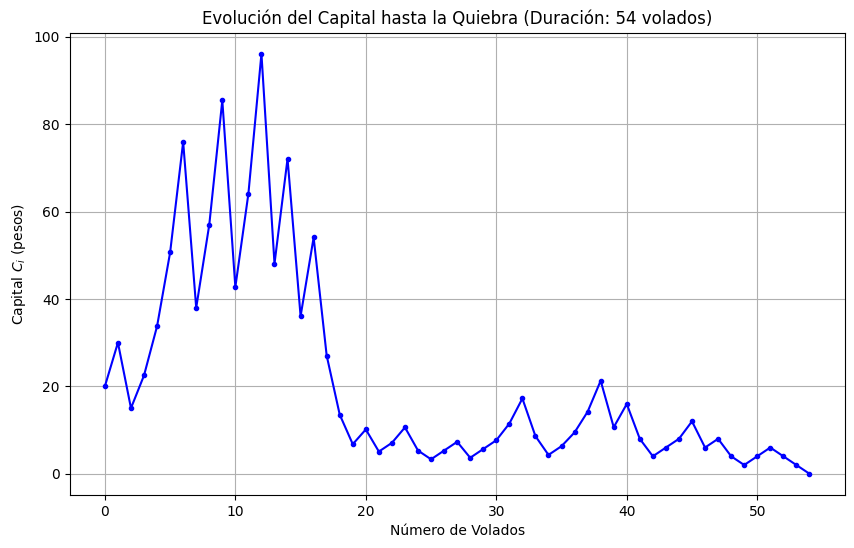

In [14]:
hist, v_t = simular_una_partida()

plt.figure(figsize=(10, 6))
plt.plot(hist, marker='.', linestyle='-', color='b')
plt.title(f'Evolución del Capital hasta la Quiebra (Duración: {v_t} volados)')
plt.xlabel('Número de Volados')
plt.ylabel('Capital $C_i$ (pesos)')
plt.grid(True)
plt.show()

2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.

In [16]:
import numpy as np

C_I = 20
No_Ap = 10000
ap = 6
A_F = 2

def simular_una_partida():
    """Simula una partida y devuelve la duración (número de volados)."""
    capital = C_I
    num_volados = 0
    while capital > 0:
        if capital >= ap:
            apuesta = capital / 2
        else:
            apuesta = A_F
        apuesta = min(apuesta, capital)
        #Volado
        resultado_volado = 1 if np.random.rand() < 0.5 else -1
        capital += resultado_volado * apuesta
        num_volados += 1
    return num_volados

#Método Montecarlo:
duraciones = []

for _ in range(No_Ap):
    duracion = simular_una_partida()
    duraciones.append(duracion)
promedio_volados = np.mean(duraciones)

print(f"Número de Apostadores Simulados: {No_Ap}")
print(f"El **Número de volados promedio** para quedar en quiebra es: **{promedio_volados:,.2f}** volados.")


Número de Apostadores Simulados: 10000
El **Número de volados promedio** para quedar en quiebra es: **24.68** volados.


3. Muestre un histograma del número de volados.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

C_I = 20
No_Ap = 10000
ap = 6
A_F = 2

def simular_una_partida_solo_duracion():
    capital = C_I
    num_volados = 0
    while capital > 0:
        if capital >= ap:
            apuesta = capital / 2
        else:
            apuesta = A_F
        apuesta = min(apuesta, capital)
        resultado_volado = 1 if np.random.rand() < 0.5 else -1
        capital += resultado_volado * apuesta
        num_volados += 1
    return num_volados

duraciones = [simular_una_partida_solo_duracion() for _ in range(No_Ap)]
promedio_volados = np.mean(duraciones)

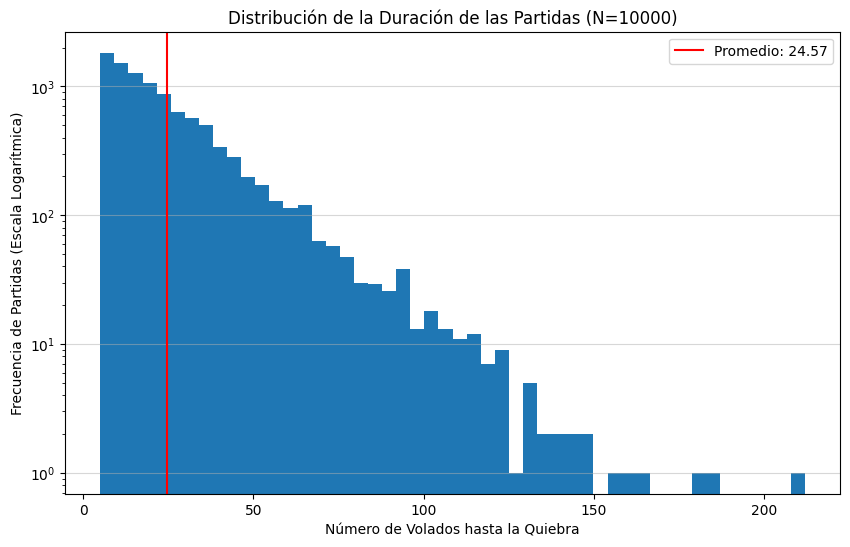

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(duraciones, bins=50, log=True)
plt.axvline(promedio_volados, color='red',label=f'Promedio: {promedio_volados:,.2f}')
plt.title(f'Distribución de la Duración de las Partidas (N={No_Ap})')
plt.xlabel('Número de Volados hasta la Quiebra')
plt.ylabel('Frecuencia de Partidas (Escala Logarítmica)')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()